### Introduction to Time Series Example 3.1:
We consider the `AirPassengers` data. We apply the Box-Cox transformation for different values of $\lambda$ to the data. The original data exhibits clear seasonal effects and an upward trend. The intensity of the seasonal influence, i.e. the variance over time, is also increasing. As we can see, the parameter $\lambda=0$, i.e. the $\log$-transform of the data, yields a stabilized image: a seemingly linear trend with homogeneus seasonal effects. 

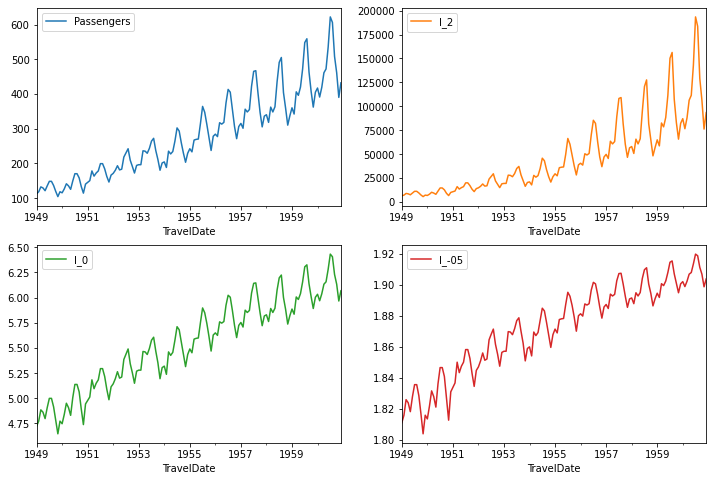

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
AirP = pd.read_csv('./data/AirPassengers.csv', parse_dates=True)

# Create pandas DateTimeIndex
dtindex = pd.DatetimeIndex(data=pd.to_datetime(AirP["TravelDate"]), 
                           freq='infer')
# Set as Index
AirP.set_index(dtindex, inplace=True)
AirP.drop("TravelDate", axis=1, inplace=True)

# Boxcox Definition:
def boxcox(x, lambd):
    if (lambd == 0):
        return np.log(x)
    else:
        return (x ** lambd - 1) / lambd
    
# Apply transform
AirP["l_2"] = boxcox(AirP["Passengers"], 2)
AirP["l_0"] = boxcox(AirP["Passengers"], 0)
AirP["l_-05"] = boxcox(AirP["Passengers"], -.5)

# Plots
fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)

AirP.plot(ax=ax[:],  subplots=True)
plt.show()

### Introduction to Time Series Example 3.2:
We look at the `AirPassengers` data and apply a time shift for various values of $k$. In `Python` we have the function `shift()` at our disposal.

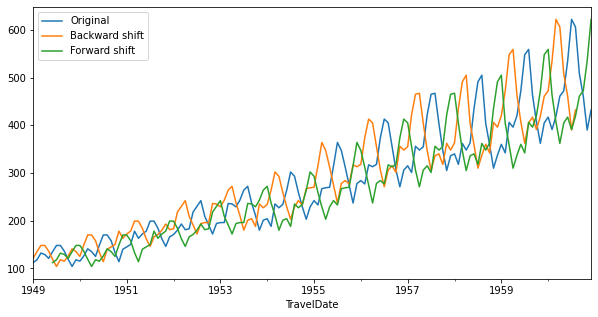

In [2]:
# Perform shift
AirP["s_4"] = AirP["Passengers"].shift(-4)
AirP["s_-5"] = AirP["Passengers"].shift(5)

# plot Results
fig, ax = plt.subplots(figsize=(10, 5))

AirP.plot(y=["Passengers", "s_4", "s_-5"], ax=ax)
plt.legend(["Original", "Backward shift", "Forward shift"])
plt.show()